In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
from typing import List
from sim_result_processor import TableProcessor

In [2]:
with open('./sim_result.json', 'r') as file:
    html_content = json.load(file)

In [3]:
html = html_content['k_40_normal']
sim_result = TableProcessor(html_table=html)
sim_result.table_processor()
sim_result.toarray()
print(sim_result.methods)
print(sim_result.nparray.shape)
print(sim_result.df)

['Huber', 'OLS', 'clarkson_woodruff', 'normal', 'RRR', 'RRR(adaptive)', 'RRS', 'RRS(adaptive)', 'sparse_sign', 'uniform_dense', 'uniform_sparse']
(2, 11, 4)
                 0.01               0.05               0.10               0.20
   Unnamed: 1_level_1 Unnamed: 2_level_1 Unnamed: 3_level_1 Unnamed: 4_level_1
0     0.0001 ± 0.0000    0.0001 ± 0.0000    0.0001 ± 0.0000    0.0001 ± 0.0000
1     0.0001 ± 0.0000    0.0001 ± 0.0000    0.0001 ± 0.0000    0.0001 ± 0.0000
2     0.0060 ± 0.0002    0.0060 ± 0.0002    0.0060 ± 0.0002    0.0060 ± 0.0002
3     0.0055 ± 0.0002    0.0055 ± 0.0002    0.0055 ± 0.0002    0.0055 ± 0.0002
4     0.0052 ± 0.0002    0.0052 ± 0.0002    0.0052 ± 0.0002    0.0052 ± 0.0002
5     0.0053 ± 0.0002    0.0053 ± 0.0002    0.0053 ± 0.0002    0.0053 ± 0.0002
6     0.0052 ± 0.0002    0.0052 ± 0.0002    0.0052 ± 0.0002    0.0052 ± 0.0002
7     0.0058 ± 0.0003    0.0058 ± 0.0003    0.0058 ± 0.0003    0.0058 ± 0.0003
8     0.0004 ± 0.0000    0.0004 ± 0.0000    0.0004 ± 

# Plot the Table

In [4]:
def plot(row:int, col:int, method_exclude:set, tables_to_extract:List, table_titles:List, new_x_labels:List, plot_name:str, xlabel:str, ylable:str='log(MSE)', legend_bbox_to_anchor:tuple=(1.05, 0.5), figsize:tuple=(12, 8), CI:bool=False):
    # makers and line styles
    markers = ['o', '^', 's', 'D', 'p', '*', 'H', 'x', '+', '1', '2']
    line_styles = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--', '-.']
    colors = plt.cm.tab10(np.linspace(0, 1, 11))

    x = np.linspace(0, 10, len(new_x_labels))

    # plot style
    fig, axes = plt.subplots(row, col, figsize=figsize)
    if not isinstance(axes, np.ndarray): 
        axes = np.array([axes])
    axes = axes.ravel()  # flatten the axes array
    
    for i in range(len(tables_to_extract)):
        table_name = tables_to_extract[i]
        sim_result = TableProcessor(html_table=html_content[table_name])
        sim_result.table_processor()
        sim_result.toarray()
        sim_array = np.log(sim_result.nparray) if plot_name != 'time' else sim_result.nparray

        style_count = 0
        for j, method in enumerate(sim_result.methods):
            if method in method_exclude: continue
            y_estimate = sim_array[0,j,:]
            y_lower = sim_array[0,j,:] - sim_array[1,j,:]
            y_upper = sim_array[0,j,:] + sim_array[1,j,:]
            
            axes[i].plot(x, y_estimate, label=f'{method}', marker=markers[style_count], linestyle=line_styles[style_count], color=colors[style_count], markersize=6, alpha=0.8)
            if CI: axes[i].fill_between(x, y_lower, y_upper, alpha=0.2)  # Confidence interval shading
            style_count += 1

        axes[i].set_title(table_titles[i])
        axes[i].set_xticks(x)
        axes[i].set_xticklabels(new_x_labels)
        # axes[i].set_xlabel('Sketching Size')
        if i == 0: axes[i].set_ylabel(ylable)
        if i == len(tables_to_extract)-1: axes[i].legend(loc='center left', 
                                  bbox_to_anchor=legend_bbox_to_anchor,
                                  borderaxespad=0.0)

    fig.supxlabel(xlabel)
    fig.savefig(f'./{plot_name}.pdf', format='pdf')
    plt.tight_layout()
    plt.show()


/var/folders/44/72pmvlr52d96w04q3bmj_jxr0000gn/T/ipykernel_37381/1579330315.py:20: RuntimeWarning: divide by zero encountered in log
  sim_array = np.log(sim_result.nparray) if plot_name != 'time' else sim_result.nparray
/var/folders/44/72pmvlr52d96w04q3bmj_jxr0000gn/T/ipykernel_37381/1579330315.py:20: RuntimeWarning: divide by zero encountered in log
  sim_array = np.log(sim_result.nparray) if plot_name != 'time' else sim_result.nparray
/var/folders/44/72pmvlr52d96w04q3bmj_jxr0000gn/T/ipykernel_37381/1579330315.py:20: RuntimeWarning: divide by zero encountered in log
  sim_array = np.log(sim_result.nparray) if plot_name != 'time' else sim_result.nparray
/var/folders/44/72pmvlr52d96w04q3bmj_jxr0000gn/T/ipykernel_37381/1579330315.py:20: RuntimeWarning: divide by zero encountered in log
  sim_array = np.log(sim_result.nparray) if plot_name != 'time' else sim_result.nparray


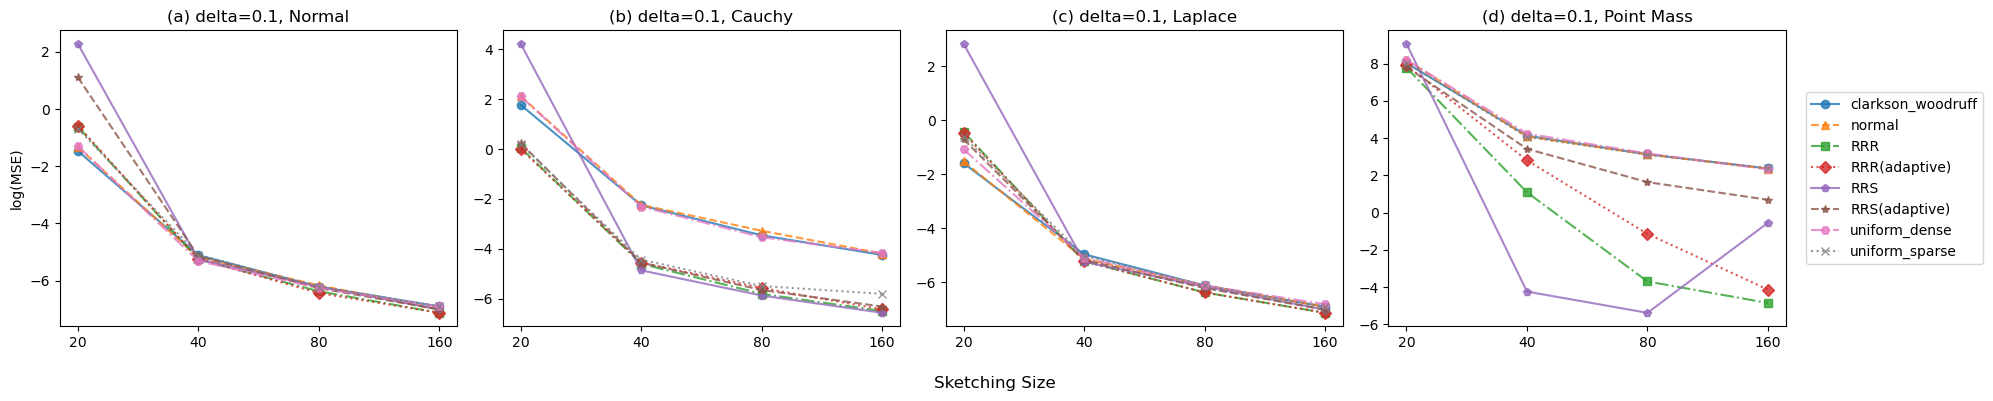

In [5]:
# vary sketching size
method_exclude = set(['Huber', 'OLS', 'sparse_sign']) # delete sparse_sign for sketching size comparasion'proposal2', 
tables_to_extract = ['delta_0_1_normal', 'delta_0_1_cauchy', 'delta_0_1_laplace', 'delta_0_1_point_mass']
table_titles = ['(a) delta=0.1, Normal', '(b) delta=0.1, Cauchy', '(c) delta=0.1, Laplace', '(d) delta=0.1, Point Mass']
new_x_labels = [20, 40, 80, 160]
row = 1
col = len(tables_to_extract)
plot_name = 'vary_sketching_size'
xlabel = 'Sketching Size'

plot(row, col, method_exclude, tables_to_extract, table_titles, new_x_labels, plot_name, xlabel, figsize = (20, 4))

/var/folders/44/72pmvlr52d96w04q3bmj_jxr0000gn/T/ipykernel_37381/1579330315.py:20: RuntimeWarning: divide by zero encountered in log
  sim_array = np.log(sim_result.nparray) if plot_name != 'time' else sim_result.nparray
/var/folders/44/72pmvlr52d96w04q3bmj_jxr0000gn/T/ipykernel_37381/1579330315.py:20: RuntimeWarning: divide by zero encountered in log
  sim_array = np.log(sim_result.nparray) if plot_name != 'time' else sim_result.nparray
/var/folders/44/72pmvlr52d96w04q3bmj_jxr0000gn/T/ipykernel_37381/1579330315.py:20: RuntimeWarning: divide by zero encountered in log
  sim_array = np.log(sim_result.nparray) if plot_name != 'time' else sim_result.nparray


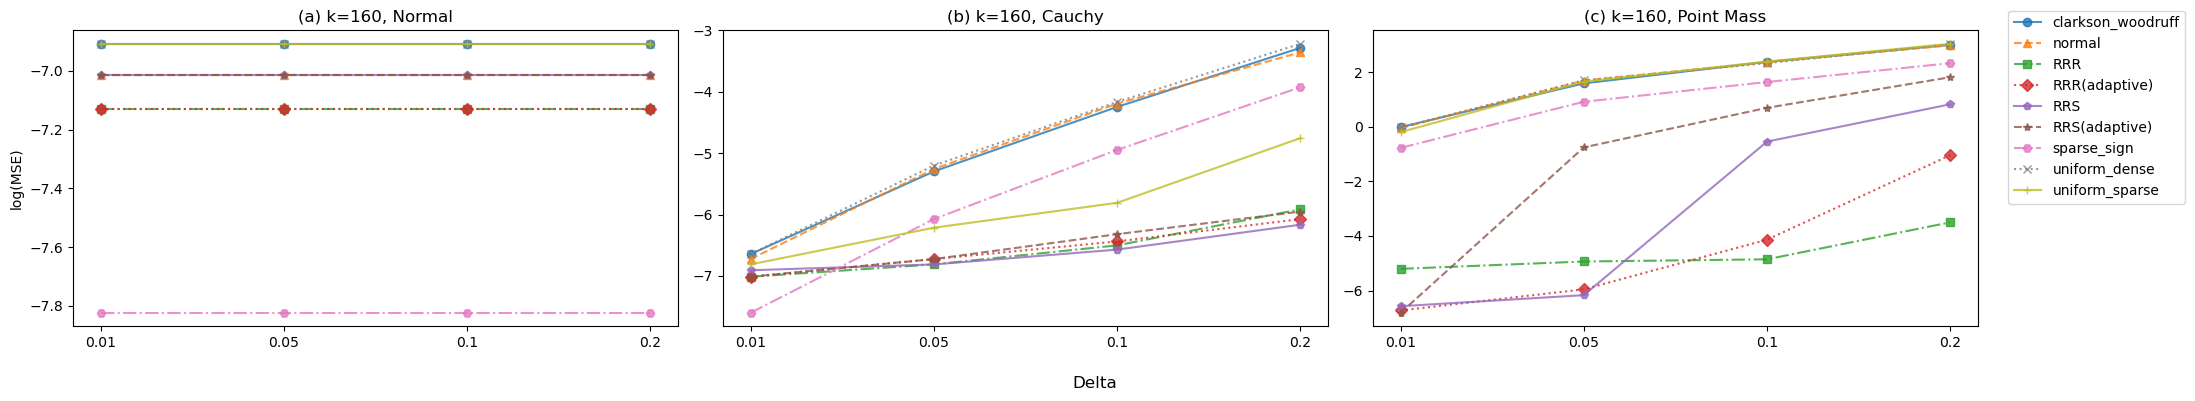

In [6]:
# contamination grows
method_exclude = set(['Huber', 'OLS']) # delete sparse_sign for sketching size comparasion , 'sparse_sign'
tables_to_extract = ['k_160_normal', 'k_160_cauchy', 'k_160_point_mass']
table_titles = ['(a) k=160, Normal', '(b) k=160, Cauchy', '(c) k=160, Point Mass']
new_x_labels = [0.01, 0.05, 0.1, 0.2]
row = 1
col = len(tables_to_extract)
plot_name = 'vary_contamination'
xlabel = 'Delta'
legend_bbox_to_anchor=(1.05, 0.74)

plot(row, col, method_exclude, tables_to_extract, table_titles, new_x_labels, plot_name, xlabel, legend_bbox_to_anchor = legend_bbox_to_anchor, figsize = (22, 4))

/var/folders/44/72pmvlr52d96w04q3bmj_jxr0000gn/T/ipykernel_37381/1579330315.py:20: RuntimeWarning: divide by zero encountered in log
  sim_array = np.log(sim_result.nparray) if plot_name != 'time' else sim_result.nparray
/var/folders/44/72pmvlr52d96w04q3bmj_jxr0000gn/T/ipykernel_37381/1579330315.py:20: RuntimeWarning: divide by zero encountered in log
  sim_array = np.log(sim_result.nparray) if plot_name != 'time' else sim_result.nparray


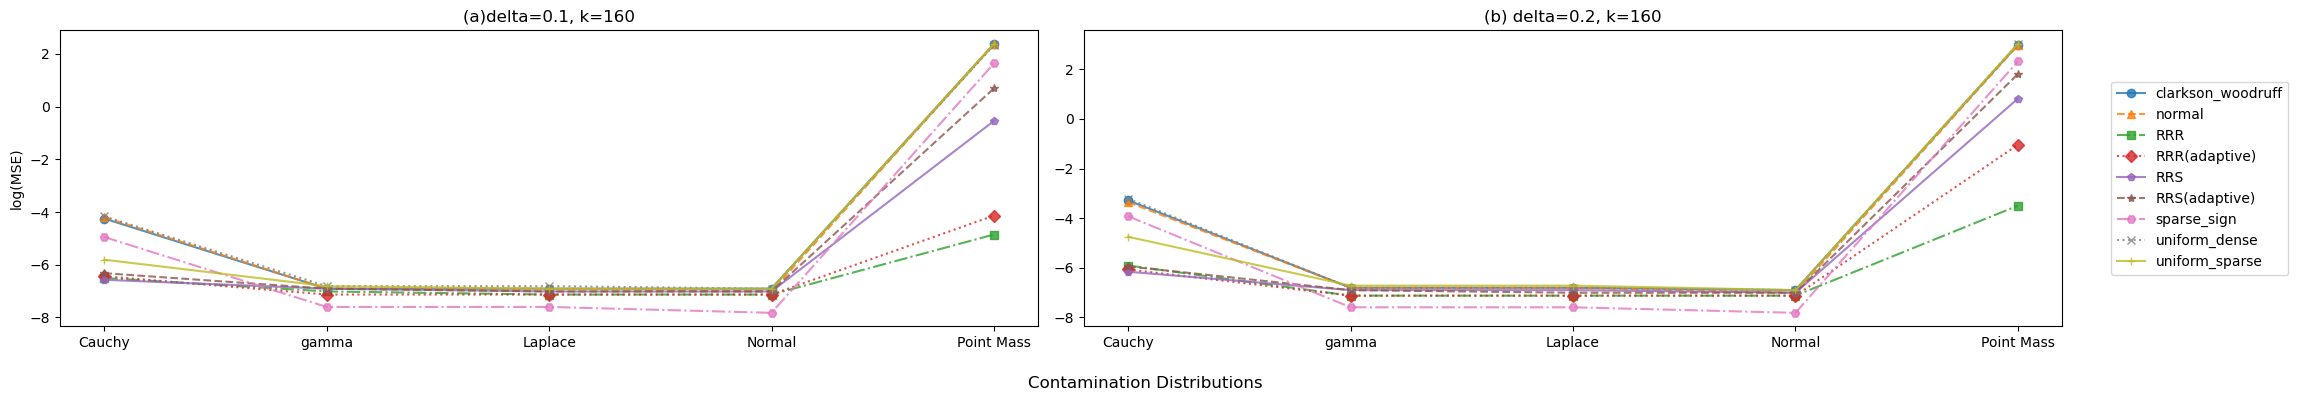

In [7]:
# contamination distribution
method_exclude = set(['Huber', 'OLS']) # delete sparse_sign for sketching size comparasion , 'sparse_sign'
tables_to_extract = ['contamination_delta_0_1_k_160', 'contamination_delta_0_2_k_160']
table_titles = ['(a)delta=0.1, k=160', '(b) delta=0.2, k=160']
new_x_labels = ['Cauchy', 'gamma', 'Laplace', 'Normal','Point Mass']
row = 1
col = len(tables_to_extract)
plot_name = 'vary_contamination_dist'
xlabel = 'Contamination Distributions'

plot(row, col, method_exclude, tables_to_extract, table_titles, new_x_labels, plot_name, xlabel, figsize = (23, 4))

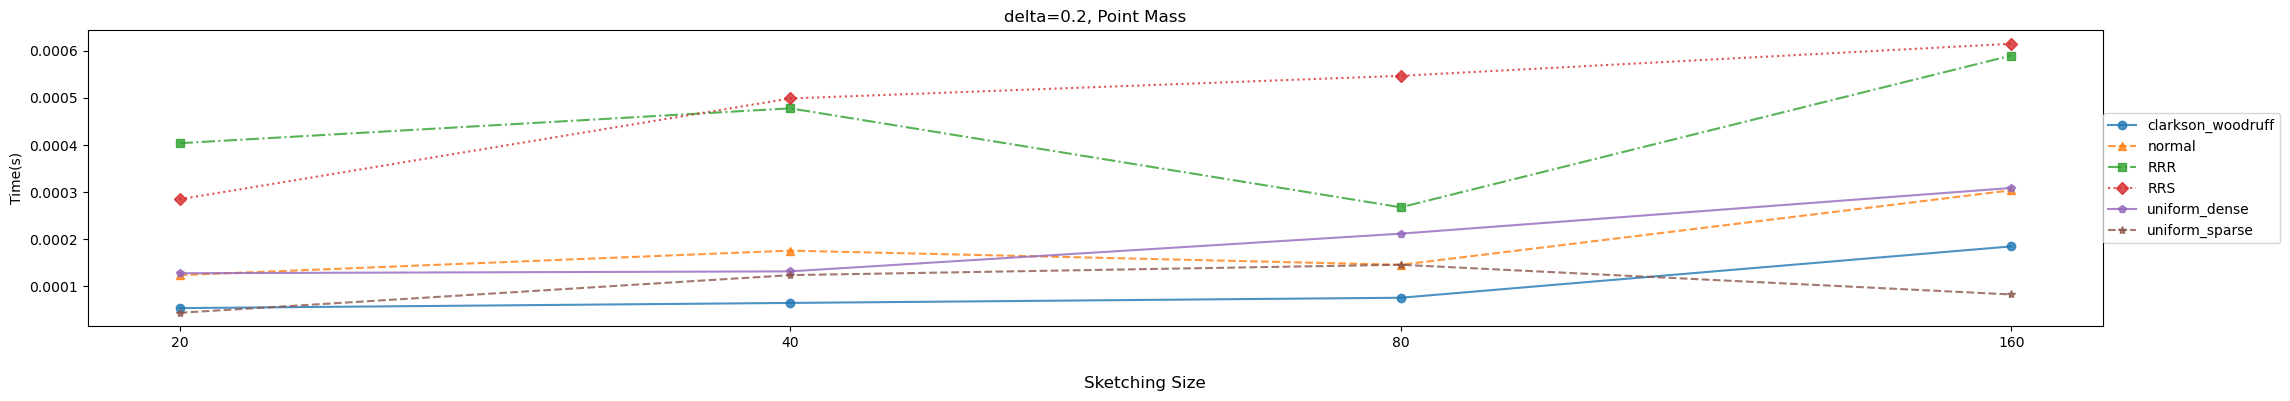

In [8]:
# time
method_exclude = set(['Huber', 'OLS', 'sparse_sign']) # delete sparse_sign for sketching size comparasion 
tables_to_extract = ['time_delta_0_2_k_40_point_mass']
table_titles = ['delta=0.2, Point Mass']
new_x_labels = [20, 40, 80, 160]
row = 1
col = len(tables_to_extract)
plot_name = 'time'
xlabel = 'Sketching Size'
ylable = 'Time(s)'
legend_bbox_to_anchor=(1, 0.5)

plot(row, col, method_exclude, tables_to_extract, table_titles, new_x_labels, plot_name, xlabel, ylable = ylable, legend_bbox_to_anchor = legend_bbox_to_anchor, figsize = (23, 4))

Note: 
- delete sparse_sign for sketching size comparasion
- Try marker and line style.
- comment on the trend and how better our methods are 